In [1]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import tensorflow as tf

import seaborn as ns
import matplotlib.pyplot as plt
% matplotlib inline

import os
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

import h5py

from scipy.stats import mode, pearsonr, f_oneway

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
train, test = train_test_split(data, test_size=0.1, random_state = 42)

In [7]:
print('Train Size {}, Test Size {}'.format(len(train),len(test)))

Train Size 1815, Test Size 202


In [ ]:
pos_tempo = data[data['target']==1]['tempo']
neg_tempo = data[data['target']==0]['tempo']

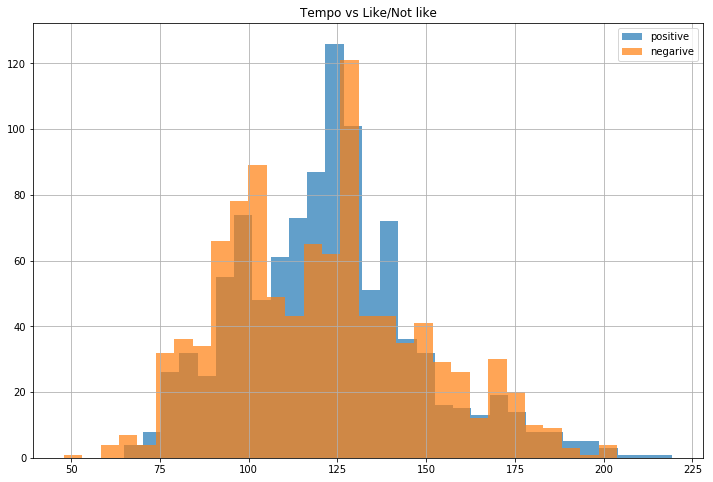

In [9]:
#https://www.youtube.com/watch?v=v_sPnwoT_iA
fig1=plt.figure(figsize=(12,8))
plt.title('Tempo vs Like/Not like')
pos_tempo.hist(alpha = 0.7, bins = 30, label = 'positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label = 'negarive')
plt.legend(loc ='upper right')